# Stroop Effect

This project investigates the statistical significance of Stroop Effect. There are two tests: One in which some names of colors are displayed to the test taker, and the words have the same color as the name displayed i.e. "red" would be colored red and "blue" would be colored blue. This is the congruent test. The incongruent test is such that the color of the words can be different from the name shown i.e. "blue" can be colored orange. The test-taker needs to look at all the words and say the color of each word correctly, not the word itself. The independent variable is the congruency/incongruency, and the dependent variable is how long it takes for the test-taker to go through all the words.

The Stroop Effect experiment is a dependent two-sample test - two tests are run on the same set of individuals. If we assume that both tests were taken by test takers around the same time (i.e. under the same conditions), that corrects for extraneous variables that might make one test much longer than the other. There might still be extraneous variables that effect both tests for individual test-takers, but we are really just concerned about the difference in time beteen the two tests.

{'boxes': [<matplotlib.lines.Line2D at 0x115b5c0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x115b5cf50>,
 'fliers': [<matplotlib.lines.Line2D at 0x115b76290>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115b6ac10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1154c9a90>,
  <matplotlib.lines.Line2D at 0x115b82550>]}

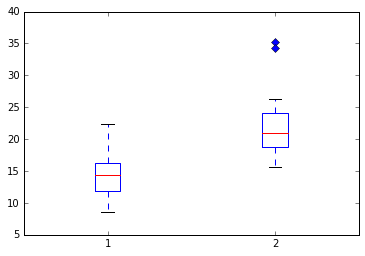

In [70]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

test_data = pd.read_csv('stroopdata.csv', nrows=26)
#display(test_data.head())
test_data
#usage_plot(trip_data, "duration", ['duration < 60'], boundary = 0, bin_width = 5)
#plt.boxplot(test_data["Congruent"], 0, "gD")
#plt.boxplot(test_data["Incongruent"], 0, "rs")
plt.boxplot([test_data["Congruent"], test_data["Incongruent"]], 0, "gD")

These boxplots shows what I expected from the histogram (below) - the distribution of the incongruent test is more skewed and takes longer than the congruent test.

In [52]:
diff = test_data['Incongruent'] - test_data['Congruent']

Now that we have the differences between the two tests, we need to write down the null hypothesis and alternative hypothesis. The null hypothesis should be that the two tests should take about the same time: population mean of response time of the congruent test (\mu_c) is approximately equal to the population mean of response time of the incongruent test (\mu_i). The alternative hypothesis should state that the incongruent test should take longer. This should be a one-tailed test because we expect that the incongruent test would take longer. Since we are going to do Incongruent response mean time - Congruent response mean time, the test should be in the positive direciton:

H_0: \mu_c = \mu_i
H_A: \mu_c < \mu_i

We can set an \alpha level of 0.05. We need to decide whether we can do a z-test or a t-test for this sample. Since we don't have population parameters and a sample with n < 30, we are going to do a t-test. We assume that this sample is large enough to be a fair representation of the population, so we can consider the difference in sample means to be approximately equal to difference in population means, and convert the sample standard deviation to \sigma using Bessel's correction.

For 24 people, the df = 23. The t-critical at 0.05 level is 1.714. If t-statistic for this sample is smaller than this value, than we will fail to reject null-hypothesis. To find the average of the sample (two ways to do that and get the same answer), we do:

In [80]:
avg = np.mean(test_data['Incongruent'])-np.mean(test_data['Congruent'])
avg2 = np.mean(diff)
print avg, avg2

7.96479166667 7.96479166667


Then we need to find standard deviation and standard error. This is a dependent sample, so the formula for standard deviation is = S = sqrt(\sum_i(x_i - \bar{x})^2/n-1):

In [63]:
inc_mean=np.mean(test_data['Incongruent'])
Sd=pow(sum(pow(diff-avg2,2))/(len(diff)-1),0.5)
print Sd

4.86482691036


In [78]:
stderr=Sd/pow(len(diff),0.5)
print stderr

0.993028634778


The t-statistic is avg/stderr. In this case, we are assuming that the sample means are approximately equal to the population mean, and applied Bessel's correction to find S from which we can calculate standard error of the sampling distribution. Using this standard error and mean we find the value of t:

In [79]:
t=avg2/stderr
print t

8.02070694411


This t-statistic is much higher than the critical t-value. This is actually at alpha level 0.001 - so our confidence level in 99.9%. The probability is very low that the two tests take nearly the same time. We can reject the null hypothesis.

This does match my expectation that it should take longer to take the incongruent test. This is most likely because there is some sort of an interference when two areas of our brain (the part that reads words and the part that perceives colors) reports two different things and one needs to pause and prioritize the color area to pass/finish the test. Another thing I noticed is that perhaps the "reads words" area reports results more quickly then the "perceives color" area. A child who cannot read yet might not have this delay, as the words will not mean anything to her - both tests should take the same time. One interesting variation would be to make the words hard to read, for instance by showing laterally inverted words or super-cursive fonts. Then, we will slow down the "reads words" area and minimize the time difference. But I think that test might make the congruent test longer as well. 

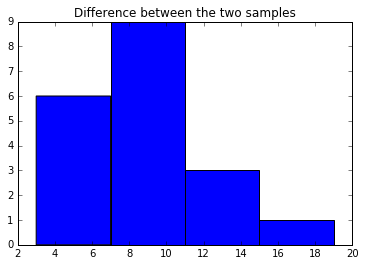

In [53]:
plt.hist(diff, bins=np.arange(3,23,4))
plt.title("Difference between the two samples")

The difference in time (incongruent - congruent) appears to be a positively skewed sample. I was expecting that the incongruent test should take longer, so the mean would be a positive value, and there would be normal distribution around that value - which would mean that about the same fraction of people take around same amount of time longer to finish the test as the other way round. But it seems that a small fraction of people will take a little longer in the second test. This possibly says something about the two parts of the brain. It must be the case that the "reads words" part is very well-developed/dominant in the right tail of the plot showed above, so it takes longer for a part of the population to override it and give preference to "perceives color" part.

In [77]:
#plt.hist(test_data["Congruent"], bins=np.arange(6,24,2))
#plt.title("Congruent test")